حلگر برای n=10 با موفقیت همگرا شد.
حلگر برای n=20 با موفقیت همگرا شد.
حلگر برای n=30 با موفقیت همگرا شد.
حلگر برای n=40 با موفقیت همگرا شد.
حلگر برای n=50 با موفقیت همگرا شد.
حلگر برای n=60 با موفقیت همگرا شد.
حلگر برای n=70 با موفقیت همگرا شد.
حلگر برای n=80 با موفقیت همگرا شد.
حلگر برای n=90 با موفقیت همگرا شد.
حلگر برای n=100 با موفقیت همگرا شد.
حلگر برای n=110 با موفقیت همگرا شد.
حلگر برای n=120 با موفقیت همگرا شد.
حلگر برای n=130 با موفقیت همگرا شد.
حلگر برای n=140 با موفقیت همگرا شد.
حلگر برای n=150 با موفقیت همگرا شد.
حلگر برای n=160 با موفقیت همگرا شد.
حلگر برای n=170 با موفقیت همگرا شد.
حلگر برای n=180 با موفقیت همگرا شد.
حلگر برای n=190 با موفقیت همگرا شد.
حلگر برای n=200 با موفقیت همگرا شد.
حلگر برای n=210 با موفقیت همگرا شد.
حلگر برای n=220 با موفقیت همگرا شد.
حلگر برای n=230 با موفقیت همگرا شد.
حلگر برای n=240 با موفقیت همگرا شد.
حلگر برای n=250 با موفقیت همگرا شد.
حلگر برای n=260 با موفقیت همگرا شد.
حلگر برای n=270 با موفقیت همگرا شد.
حلگر برای n=280 با موفقیت همگرا شد.
ح

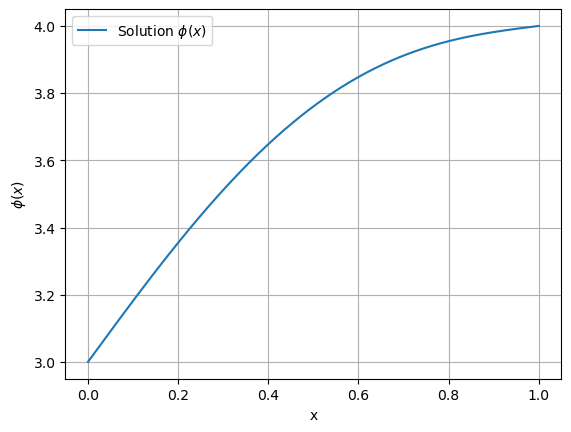

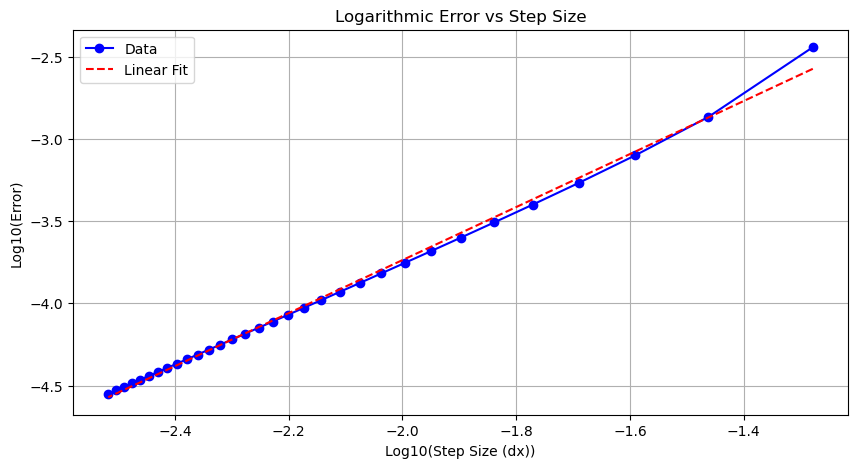

Slope: 1.6126, Intercept: -0.5115


In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import cg, spilu, LinearOperator
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


L = 1.0        
n_start = 10  
n_end = 330   
n_step = 10  
errors = []  

phi_a = 3
phi_b = 4 

def s(x):
    return 10 * x * (1 - x)    

phi_previous = None
dx_values = []

for n in range(n_start, n_end + 1, n_step):
    dx = L / (n - 1) 
    x = np.linspace(0, L, n)
    dx_values.append(dx)

    diagonals = [
        np.ones(n-1),    
        -2 * np.ones(n),    
        np.ones(n-1)        
    ]

    A = diags(diagonals, offsets=[-1, 0, 1], shape=(n, n)) / dx**2
    A = A.tocsr()     
    A = A.tocsc() 
    
    b = -s(x)
    b[0] = phi_a
    b[-1] = phi_b

    A[0, 0] = 1
    A[0, 1] = 0
    A[-1, -1] = 1
    A[-1, -2] = 0

    M = spilu(A)
    M2 = LinearOperator(A.shape, M.solve)

    max_iter = 1000 
    tolerance = 1e-8 

    phi_numeric, info = cg(A, b, M=M2, maxiter=max_iter, tol=tolerance)

    if info == 0:
        print(f"حلگر برای n={n} با موفقیت همگرا شد.")
    else:
        print(f"حلگر برای n={n} به همگرایی نرسید.")

    if phi_previous is not None:
        phi_previous_interp = np.interp(x, np.linspace(0, L, len(phi_previous)), phi_previous)
        error = np.linalg.norm(phi_numeric - phi_previous_interp, ord=2)  
        errors.append(error)
    else:
        errors.append(np.nan) 

    phi_previous = phi_numeric


plt.plot(x, phi_numeric, label='Solution $\\phi(x)$')
plt.xlabel('x')
plt.ylabel('$\\phi(x)$')
plt.legend()
plt.grid(True)
plt.show()


log_dx = np.log10(dx_values[1:])
log_errors = np.log10(errors[1:])

slope, intercept = LinearRegression().fit(log_dx.reshape(-1, 1), log_errors.reshape(-1, 1)).coef_[0][0], \
                   LinearRegression().fit(log_dx.reshape(-1, 1), log_errors.reshape(-1, 1)).intercept_[0]


plt.figure(figsize=(10, 5))
plt.plot(log_dx, log_errors, 'bo-', label='Data')
plt.plot(log_dx, slope * log_dx + intercept, 'r--', label='Linear Fit')
plt.xlabel('Log10(Step Size (dx))')
plt.ylabel('Log10(Error)')
plt.title('Logarithmic Error vs Step Size')
plt.legend()
plt.grid(True)
plt.show()
print(f'Slope: {slope:.4f}, Intercept: {intercept:.4f}')